In [2]:
import sys, os
sys.path.insert(0, '../../')
sys.path.insert(0, '../../python_src/')

import numpy as np
import scipy as sp
import pandas as pd
import numpy.random as rand
import scipy.optimize as spo
import scipy.interpolate as spi
import cPickle as pickle
import portalocker
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
import shutil, shelve
import tarfile
import time
import itertools as it
import matplotlib.lines as mlines
import matplotlib as mpl

import mech_network_solver as mns
import network
import tuning_algs as talgs
import network_plot as nplot
import curve_fitting as curve

Loading Mechanical Network Deformation Solver Module


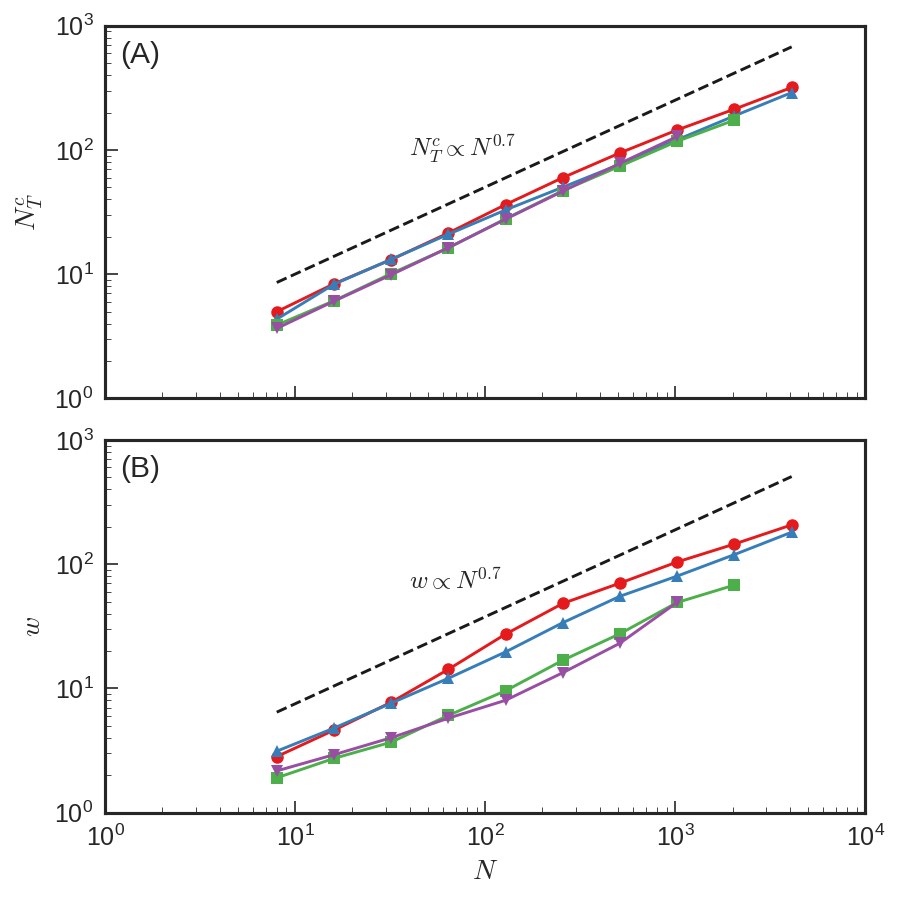

In [54]:
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['mathtext.fontset'] = 'cm'
sns.set(color_codes=True)
sns.set_context('paper', font_scale=1.5)
sns.set_palette("Set1", 8)
# sns.set_palette("muted", 8)
sns.set_style('ticks', {'xtick.direction': 'in','ytick.direction': 'in', 'axes.linewidth': 1.5})

# def pow_law(x, A, B, C):
#     return A + B * x**C

# def pow_law(x, B, C):
#     return B * x**C

def pow_law(x, A, B, C, D, E):
    return A + B * x**C * (1.0 + D*x**E)


# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey='row')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

# # ax1.legend(loc="lower left", ncol=1, prop={'size':14})
# ax1.set_ylabel(r'$f_{\mathrm{sat}}$')



palette = it.cycle(sns.color_palette("Set1", 8))



fn = "tune_disc_1D_edge_default"

with open("{}_fsat_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_fit = data['df']

with open("{}_power_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_pow = data['df']
        
color = next(palette)

NN = np.array(df_fit['NN'])

NTc = np.array(df_fit['NTc'])
NTc_err = np.array(df_fit['NTc_err'])

# ax1.errorbar(NN, NTc, yerr=NTc_err, fmt="-o", 
#                  color=color, markersize=6,
#             label="Flow Network - Edge Source")

ax1.plot(NN, NTc, "-o", 
                 color=color, markersize=6,
            label="Flow Network - Edge Source")

# ax1.scatter(NN, NTc, marker="o", 
#                  color=color, s=9)



    
func = df_pow.iloc[0]['NTc_fit_func']
fit_param = df_pow.iloc[0]['NTc_fit_param']

# ax1.plot(10**np.linspace(0, 4, 1000), func(10**np.linspace(0,4, 1000), *fit_param), '-', color=color)



fn = "tune_disc_1D_nodepair_default"

with open("{}_fsat_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_fit = data['df']

with open("{}_power_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_pow = data['df']
        
color = next(palette)

NN = np.array(df_fit['NN'])

NTc = np.array(df_fit['NTc'])
NTc_err = np.array(df_fit['NTc_err'])

# ax1.errorbar(NN, NTc, yerr=NTc_err, fmt="-^", 
#                  color=color, markersize=6,
#             label="Flow Network - Node Pair Source")

ax1.plot(NN, NTc, "-^", 
                 color=color, markersize=6,
            label="Flow Network - Node Pair Source")

# ax1.scatter(NN, NTc, marker="o", 
#                  color=color, s=9)
    
func = df_pow.iloc[0]['NTc_fit_func']
fit_param = df_pow.iloc[0]['NTc_fit_param']

# ax1.plot(10**np.linspace(0, 4, 1000), func(10**np.linspace(0,4, 1000), *fit_param), '-', color=color)






fn = "tune_disc_2D_edge_slice"

with open("{}_fsat_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_fit = data['df'].query("NN==8 or NN==16 or NN==32 or NN==64 or NN==128 or NN==256 or NN==512 or NN==1024 or NN==2048")

with open("{}_power_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_pow = data['df']
        
color = next(palette)

NN = np.array(df_fit['NN'])

NTc = np.array(df_fit['NTc'])
NTc_err = np.array(df_fit['NTc_err'])

# ax1.errorbar(NN, NTc, yerr=NTc_err, fmt="-s", 
#                  color=color, markersize=6, 
#              label="2D Spring Network - Edge Source")

ax1.plot(NN, NTc, "-s", 
                 color=color, markersize=6, 
             label="2D Spring Network - Edge Source")

# ax1.scatter(NN, NTc, marker="o", 
#                  color=color, s=9)
    
func = df_pow.iloc[0]['NTc_fit_func']
fit_param = df_pow.iloc[0]['NTc_fit_param']

# ax1.plot(10**np.linspace(0, 4, 1000), func(10**np.linspace(0,4, 1000), *fit_param), '-', color=color)



fn = "tune_disc_2D_nodepair_default"

with open("{}_fsat_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_fit = data['df']

with open("{}_power_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_pow = data['df']
        
color = next(palette)

NN = np.array(df_fit['NN'])

NTc = np.array(df_fit['NTc'])
NTc_err = np.array(df_fit['NTc_err'])

# ax1.errorbar(NN, NTc, yerr=NTc_err, fmt="-v", 
#                  color=color, markersize=6,
#              label="2D Spring Network - Node Pair Source")

ax1.plot(NN, NTc, "-v", 
                 color=color, markersize=6,
             label="2D Spring Network - Node Pair Source")

# ax1.scatter(NN, NTc, marker="o", 
#                  color=color, s=9)
    
func = df_pow.iloc[0]['NTc_fit_func']
fit_param = df_pow.iloc[0]['NTc_fit_param']

# ax1.plot(10**np.linspace(0, 4, 1000), func(10**np.linspace(0,4, 1000), *fit_param), '-', color=color)



#####################################################################



palette = it.cycle(sns.color_palette("Set1", 8))





fn = "tune_disc_1D_edge_default"

with open("{}_fsat_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_fit = data['df']

with open("{}_power_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_pow = data['df']
        
color = next(palette)

NN = np.array(df_fit['NN'])

width = np.array(df_fit['width'])
width_err = np.array(df_fit['width_err'])

# ax2.errorbar(NN, width, yerr=width_err, fmt="-o", 
#                  color=color, markersize=6)

ax2.plot(NN, width, "-o", 
                 color=color, markersize=6)
 
# ax2.scatter(NN, width, marker="o", 
#                  color=color, s=9)
    
func = df_pow.iloc[0]['width_fit_func']
fit_param = df_pow.iloc[0]['width_fit_param']

# ax2.plot(10**np.linspace(0, 4, 1000), func(10**np.linspace(0,4, 1000), *fit_param), '-', color=color)



fn = "tune_disc_1D_nodepair_default"

with open("{}_fsat_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_fit = data['df']

with open("{}_power_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_pow = data['df']
                
color = next(palette)

NN = np.array(df_fit['NN'])

width = np.array(df_fit['width'])
width_err = np.array(df_fit['width_err'])

# ax2.errorbar(NN, width, yerr=width_err, fmt="-^", 
#                  color=color, markersize=6)

ax2.plot(NN, width, "-^", 
                 color=color, markersize=6)
# ax2.scatter(NN, width, marker="o", 
#                  color=color, s=9)
    
func = df_pow.iloc[0]['width_fit_func']
fit_param = df_pow.iloc[0]['width_fit_param']

# ax2.plot(10**np.linspace(0, 4, 1000), func(10**np.linspace(0,4, 1000), *fit_param), '-', color=color)







fn = "tune_disc_2D_edge_slice"

with open("{}_fsat_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_fit = data['df'].query("NN==8 or NN==16 or NN==32 or NN==64 or NN==128 or NN==256 or NN==512 or NN==1024 or NN==2048")

with open("{}_power_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_pow = data['df']
        
color = next(palette)

NN = np.array(df_fit['NN'])

width = np.array(df_fit['width'])
width_err = np.array(df_fit['width_err'])

# ax2.errorbar(NN, width, yerr=width_err, fmt="-s", 
#                  color=color, markersize=6)

ax2.plot(NN, width, "-s", 
                 color=color, markersize=6)
 
# ax2.scatter(NN, width, marker="o", 
#                  color=color, s=9)
    
func = df_pow.iloc[0]['width_fit_func']
fit_param = df_pow.iloc[0]['width_fit_param']

# ax2.plot(10**np.linspace(0, 4, 1000), func(10**np.linspace(0,4, 1000), *fit_param), '-', color=color)



fn = "tune_disc_2D_nodepair_default"

with open("{}_fsat_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_fit = data['df']

with open("{}_power_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_pow = data['df']
                
color = next(palette)

NN = np.array(df_fit['NN'])

width = np.array(df_fit['width'])
width_err = np.array(df_fit['width_err'])

# ax2.errorbar(NN, width, yerr=width_err, fmt="-v", 
#                  color=color, markersize=6)

ax2.plot(NN, width, "-v", 
                 color=color, markersize=6)
# ax2.scatter(NN, width, marker="o", 
#                  color=color, s=9)
    
func = df_pow.iloc[0]['width_fit_func']
fit_param = df_pow.iloc[0]['width_fit_param']

# ax2.plot(10**np.linspace(0, 4, 1000), func(10**np.linspace(0,4, 1000), *fit_param), '-', color=color)



ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e0, 1e4)
ax1.set_ylim(1e0, 1e3)

ax1.set_ylabel(r'$N_T^c$')

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(1e0, 1e4)
ax2.set_ylim(1e0, 1e3)

ax2.set_ylabel(r'$w$')
ax2.set_xlabel(r'$N$')
    
ax1.text(0.02, 0.9, '(A)', transform=ax1.transAxes)
ax2.text(0.02, 0.9, '(B)', transform=ax2.transAxes)

# ax1.legend(loc='upper left', ncol=1, prop={'size':10})

x = 10**np.linspace(np.log10(8), np.log10(4096), 1000)

def pow_law(x, A, B):
    return A*x**B

# ax1.plot(x, pow_law(x, 6e-1, 0.7), 'k--', label=r"$N_T^c \propto N^{0.7}$")
# ax1.text(0.5, 0.3, r'$N_T^c \propto N^{0.7}$', transform=ax1.transAxes, fontsize=12)


ax1.plot(x, pow_law(x, 2.0, 0.7), 'k--', label=r"$N_T^c \propto N^{0.7}$")
ax1.text(0.4, 0.65, r'$N_T^c \propto N^{0.7}$', transform=ax1.transAxes, fontsize=12)

ax2.plot(x, pow_law(x, 1.5, 0.7), 'k--', label=r"$w \propto N^{0.7}$")
ax2.text(0.4, 0.6, r'$w \propto N^{0.7}$', transform=ax2.transAxes, fontsize=12)
  
fig.tight_layout(pad=0.5)
    
plt.savefig("figure3.pdf")
    
plt.show()

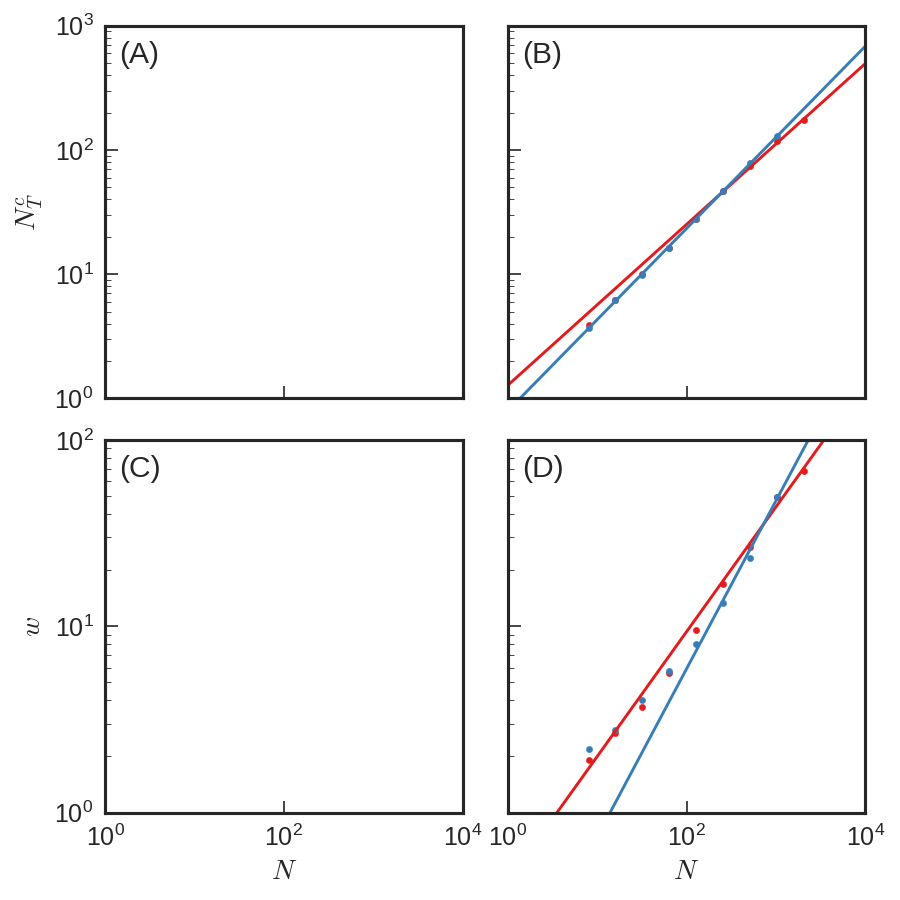

In [58]:
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['mathtext.fontset'] = 'cm'
sns.set(color_codes=True)
sns.set_context('paper', font_scale=1.5)
sns.set_palette("Set1", 8)
# sns.set_palette("muted", 8)
sns.set_style('ticks', {'xtick.direction': 'in','ytick.direction': 'in', 'axes.linewidth': 1.5})

# def pow_law(x, A, B, C):
#     return A + B * x**C

def pow_law(x, B, C):
    return B * x**C


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey='row')

# # ax1.legend(loc="lower left", ncol=1, prop={'size':14})
# ax1.set_ylabel(r'$f_{\mathrm{sat}}$')



palette = it.cycle(sns.color_palette("Set1", 8))


fn = "tune_disc_2D_edge_slice"

with open("{}_fsat_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_fit = data['df'].query("NN==8 or NN==16 or NN==32 or NN==64 or NN==128 or NN==256 or NN==512 or NN==1024 or NN==2048")

with open("{}_power_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_pow = data['df']
        
color = next(palette)

NN = np.array(df_fit['NN'])

NTc = np.array(df_fit['NTc'])
NTc_err = np.array(df_fit['NTc_err'])

# ax2.errorbar(NN, NTc, yerr=NTc_err, fmt="o", 
#                  color=color, markersize=3)

ax2.scatter(NN, NTc, marker="o", 
                 color=color, s=9)
    
func = df_pow.iloc[0]['NTc_fit_func']
fit_param = df_pow.iloc[0]['NTc_fit_param']

ax2.plot(10**np.linspace(0, 4, 1000), func(10**np.linspace(0,4, 1000), *fit_param), '-', color=color)



fn = "tune_disc_2D_nodepair_default"

with open("{}_fsat_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_fit = data['df']

with open("{}_power_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_pow = data['df']
        
color = next(palette)

NN = np.array(df_fit['NN'])

NTc = np.array(df_fit['NTc'])
NTc_err = np.array(df_fit['NTc_err'])

# ax2.errorbar(NN, NTc, yerr=NTc_err, fmt="o", 
#                  color=color, markersize=3)

ax2.scatter(NN, NTc, marker="o", 
                 color=color, s=9)
    
func = df_pow.iloc[0]['NTc_fit_func']
fit_param = df_pow.iloc[0]['NTc_fit_param']

ax2.plot(10**np.linspace(0, 4, 1000), func(10**np.linspace(0,4, 1000), *fit_param), '-', color=color)



#####################################################################



palette = it.cycle(sns.color_palette("Set1", 8))


fn = "tune_disc_2D_edge_slice"

with open("{}_fsat_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_fit = data['df'].query("NN==8 or NN==16 or NN==32 or NN==64 or NN==128 or NN==256 or NN==512 or NN==1024 or NN==2048")

with open("{}_power_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_pow = data['df']
        
color = next(palette)

NN = np.array(df_fit['NN'])

width = np.array(df_fit['width'])
width_err = np.array(df_fit['width_err'])

# ax4.errorbar(NN, width, yerr=width_err, fmt="o", 
#                  color=color, markersize=3)
 
ax4.scatter(NN, width, marker="o", 
                 color=color, s=9)
    
func = df_pow.iloc[0]['width_fit_func']
fit_param = df_pow.iloc[0]['width_fit_param']

ax4.plot(10**np.linspace(0, 4, 1000), func(10**np.linspace(0,4, 1000), *fit_param), '-', color=color)



fn = "tune_disc_2D_nodepair_default"

with open("{}_fsat_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_fit = data['df']

with open("{}_power_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_pow = data['df']
                
color = next(palette)

NN = np.array(df_fit['NN'])

width = np.array(df_fit['width'])
width_err = np.array(df_fit['width_err'])

# ax4.errorbar(NN, width, yerr=width_err, fmt="o", 
#                  color=color, markersize=3)
ax4.scatter(NN, width, marker="o", 
                 color=color, s=9)
    
func = df_pow.iloc[0]['width_fit_func']
fit_param = df_pow.iloc[0]['width_fit_param']

ax4.plot(10**np.linspace(0, 4, 1000), func(10**np.linspace(0,4, 1000), *fit_param), '-', color=color)











ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e0, 1e4)
ax1.set_ylim(1e0, 1e3)

ax1.set_ylabel(r'$N_T^c$')

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(1e0, 1e4)
ax2.set_ylim(1e0, 1e3)

ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlim(1e0, 1e4)
ax3.set_ylim(1e0, 1e2)

ax3.set_ylabel(r'$w$')
ax3.set_xlabel(r'$N$')

ax4.set_xscale('log')
ax4.set_yscale('log')

ax4.set_xlabel(r'$N$')

    
ax1.text(0.04, 0.9, '(A)', transform=ax1.transAxes)
ax2.text(0.04, 0.9, '(B)', transform=ax2.transAxes)
ax3.text(0.04, 0.9, '(C)', transform=ax3.transAxes)
ax4.text(0.04, 0.9, '(D)', transform=ax4.transAxes)
  
fig.tight_layout(pad=0.5, w_pad=0.2)
    
plt.savefig("figure3.pdf")
    
plt.show()